# Linear Regression Modeling
---

In [1]:
## Print python version
from platform import python_version
print('Python Version:', python_version())

Python Version: 3.9.12


In [2]:
## Import libraries/packages
import numpy as np
from numpy.linalg import eig
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18,10)
plt.rcParams['figure.max_open_warning'] = False
import patchworklib as pw
pw.overwrite_axisgrid()
from scipy.stats import zscore
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

<Figure size 72x72 with 0 Axes>

In [3]:
df = pd.read_csv('churn_clean.csv').reset_index(drop=True)

# Research Question
---
> What variables impact the amount of bandwidth a customer uses per year?
---

# Data Preparation
---

In [4]:
## View data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [5]:
## Rename survey columns
df.rename({
    'Item1':'TimelyResponse',
    'Item2':'TimelyFixes',
    'Item3':'TimelyReplacements',
    'Item4':'Reliability',
    'Item5':'Options',
    'Item6':'RespectfulResponse',
    'Item7':'CourteousExchange',
    'Item8':'ActiveListening'
}, axis=1, inplace=True)

In [6]:
## View summary statistics
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,TimelyFixes,TimelyReplacements,Reliability,Options,RespectfulResponse,CourteousExchange,ActiveListening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [7]:
## Drop less meaningful columns
df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 
              'Area', 'TimeZone', 'Job', 'Marital', 'Gender', 'Churn', 'Email', 'Multiple', 'OnlineSecurity',
              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling', 'PaymentMethod', 
              'TimelyResponse', 'TimelyFixes', 'TimelyReplacements', 'Reliability', 'Options', 'RespectfulResponse',
              'CourteousExchange', 'ActiveListening'], axis=1)

In [8]:
## Create copy of dataframe
df1 = df.copy()

In [9]:
## Check for missing values
df1.isna().sum()

Population              0
Children                0
Age                     0
Income                  0
Outage_sec_perweek      0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
StreamingTV             0
StreamingMovies         0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
dtype: int64

In [10]:
## Check for duplicate values
df1.duplicated().value_counts()

False    10000
dtype: int64

In [11]:
## Check for outliers
df1.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.0877,53.078400,39806.926771,10.001848,0.994200,0.398000,34.526188,172.624816,3392.341550
std,14432.698671,2.1472,20.698882,28199.916702,2.976019,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.000000,0.0000,18.000000,348.670000,0.099747,0.000000,0.000000,1.000259,79.978860,155.506715
25%,738.000000,0.0000,35.000000,19224.717500,8.018214,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,2910.500000,1.0000,53.000000,33170.605000,10.018560,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,13168.000000,3.0000,71.000000,53246.170000,11.969485,2.000000,1.000000,61.479795,200.734725,5586.141370
max,111850.000000,10.0000,89.000000,258900.700000,21.207230,7.000000,6.000000,71.999280,290.160419,7158.981530


In [12]:
## Separate object variables
df2 = pd.DataFrame([df1[col] for col in df1.columns if df1[col].dtype != 'object']).transpose()

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            10000 non-null  float64
 1   Children              10000 non-null  float64
 2   Age                   10000 non-null  float64
 3   Income                10000 non-null  float64
 4   Outage_sec_perweek    10000 non-null  float64
 5   Contacts              10000 non-null  float64
 6   Yearly_equip_failure  10000 non-null  float64
 7   Tenure                10000 non-null  float64
 8   MonthlyCharge         10000 non-null  float64
 9   Bandwidth_GB_Year     10000 non-null  float64
dtypes: float64(10)
memory usage: 781.4 KB


In [14]:
## Normalize data and exclude outliers
df2 = df2[zscore(df2).abs() < 3]

In [15]:
## Count outliers
df2.isna().sum()

Population              219
Children                191
Age                       0
Income                  145
Outage_sec_perweek       28
Contacts                165
Yearly_equip_failure     94
Tenure                    0
MonthlyCharge             0
Bandwidth_GB_Year         0
dtype: int64

In [16]:
## Drop outlier values
df2.dropna(inplace=True)

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9187 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            9187 non-null   float64
 1   Children              9187 non-null   float64
 2   Age                   9187 non-null   float64
 3   Income                9187 non-null   float64
 4   Outage_sec_perweek    9187 non-null   float64
 5   Contacts              9187 non-null   float64
 6   Yearly_equip_failure  9187 non-null   float64
 7   Tenure                9187 non-null   float64
 8   MonthlyCharge         9187 non-null   float64
 9   Bandwidth_GB_Year     9187 non-null   float64
dtypes: float64(10)
memory usage: 789.5 KB


In [18]:
## Measure data loss
lost = ((len(df1) - len(df2))/len(df1))*100
remaining = 100 - lost
print('{}% of data lost\n{}% of data remains'.format(round(lost, 2), remaining))

8.13% of data lost
91.87% of data remains


In [19]:
## Combine dataframes
df = df.loc[df2.index]
df1 = df1.loc[df2.index]

In [20]:
## Reset index values
df = df.reset_index(drop=True)
df1 = df1.reset_index(drop=True)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9187 entries, 0 to 9186
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            9187 non-null   int64  
 1   Children              9187 non-null   int64  
 2   Age                   9187 non-null   int64  
 3   Income                9187 non-null   float64
 4   Outage_sec_perweek    9187 non-null   float64
 5   Contacts              9187 non-null   int64  
 6   Yearly_equip_failure  9187 non-null   int64  
 7   Techie                9187 non-null   object 
 8   Contract              9187 non-null   object 
 9   Port_modem            9187 non-null   object 
 10  Tablet                9187 non-null   object 
 11  InternetService       9187 non-null   object 
 12  Phone                 9187 non-null   object 
 13  StreamingTV           9187 non-null   object 
 14  StreamingMovies       9187 non-null   object 
 15  Tenure               

# Data Exploration
---

In [22]:
df1.head()

,Population,Children,Age,Income,Outage_sec_perweek,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,StreamingTV,StreamingMovies,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,0,68,28561.99,7.978323,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,6.795513,172.455519,904.536110
1,10446,1,27,21704.77,11.699080,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,1.156681,242.632554,800.982766
2,3735,4,50,9609.57,10.752800,0,1,Yes,Two Year,Yes,No,DSL,Yes,No,Yes,15.754144,159.947583,2054.706961
3,13863,1,48,18925.23,14.913540,2,0,Yes,Two Year,No,No,DSL,Yes,Yes,No,17.087227,119.956840,2164.579412
4,11352,0,83,40074.19,8.147417,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,Yes,No,1.670972,149.948316,271.493436


## Variable Analysis
### Dependent Variable

In [23]:
df1.Bandwidth_GB_Year.describe()

count    9187.000000
mean     3380.828444
std      2186.203561
min       155.506715
25%      1226.443806
50%      3170.023123
75%      5581.680830
max      7158.981530
Name: Bandwidth_GB_Year, dtype: float64

### Independent Variables

In [24]:
independent_vars = pd.DataFrame(columns=['min', 'max', 'std', 'mean', 'median', 'mode'])

In [25]:
for col in df1.columns:
    if df1[col].dtype != object:
        independent_vars.loc[col] = [
            min(df1[col]),
            max(df1[col]),
            np.std(df1[col]),
            df1[col].mean(),
            df1[col].median(),
            df1[col].mode().values[0]
        ]

In [26]:
independent_vars

,min,max,std,mean,median,mode
Population,0.000000,52967.000000,11800.643811,8527.956351,2723.000000,0.000000
Children,0.000000,8.000000,1.896481,1.945140,1.000000,0.000000
Age,18.000000,89.000000,20.652026,53.093719,53.000000,63.000000
Income,348.670000,124025.100000,25047.808066,38292.814559,32773.010000,10530.090000
Outage_sec_perweek,1.144796,18.851730,2.927587,10.006093,10.020680,10.488750
Contacts,0.000000,3.000000,0.898659,0.940350,1.000000,1.000000
Yearly_equip_failure,0.000000,2.000000,0.582403,0.374551,0.000000,0.000000
Tenure,1.005104,71.999280,26.448028,34.443530,30.769800,55.449910
MonthlyCharge,79.978860,290.160419,42.982861,172.733169,169.937800,179.947600
Bandwidth_GB_Year,155.506715,7158.981530,2186.084575,3380.828444,3170.023123,155.506715


## Univariate Distributions
### Continuous Variables

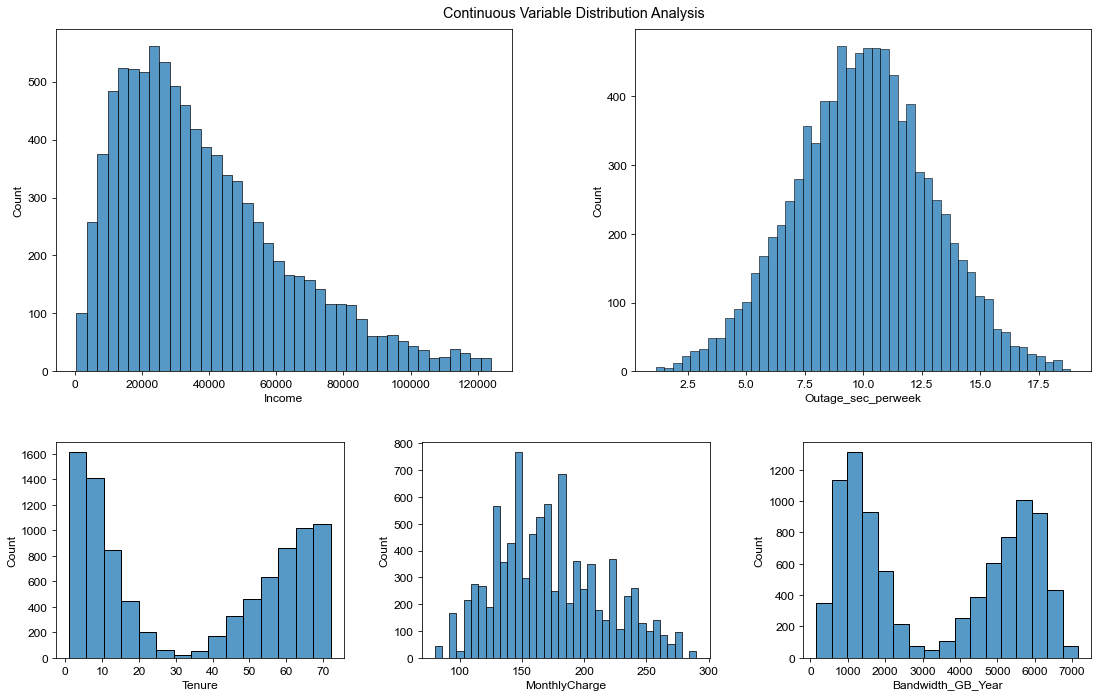

In [27]:
ax1 = pw.Brick(figsize=(4,3))
sns.histplot(df1.Income, ax=ax1)
ax2 = pw.Brick(figsize=(4,3))
sns.histplot(df1.Outage_sec_perweek, ax=ax2)
ax3 = pw.Brick(figsize=(4,3))
sns.histplot(df1.Tenure, ax=ax3)
ax4 = pw.Brick(figsize=(4,3))
sns.histplot(df1.MonthlyCharge, ax=ax4)
ax5 = pw.Brick(figsize=(4,3))
sns.histplot(df1.Bandwidth_GB_Year, ax=ax5)
stacks = (ax1|ax2)/(ax3|ax4|ax5)
stacks.set_suptitle('Continuous Variable Distribution Analysis')
stacks.savefig()

### Discrete Variables

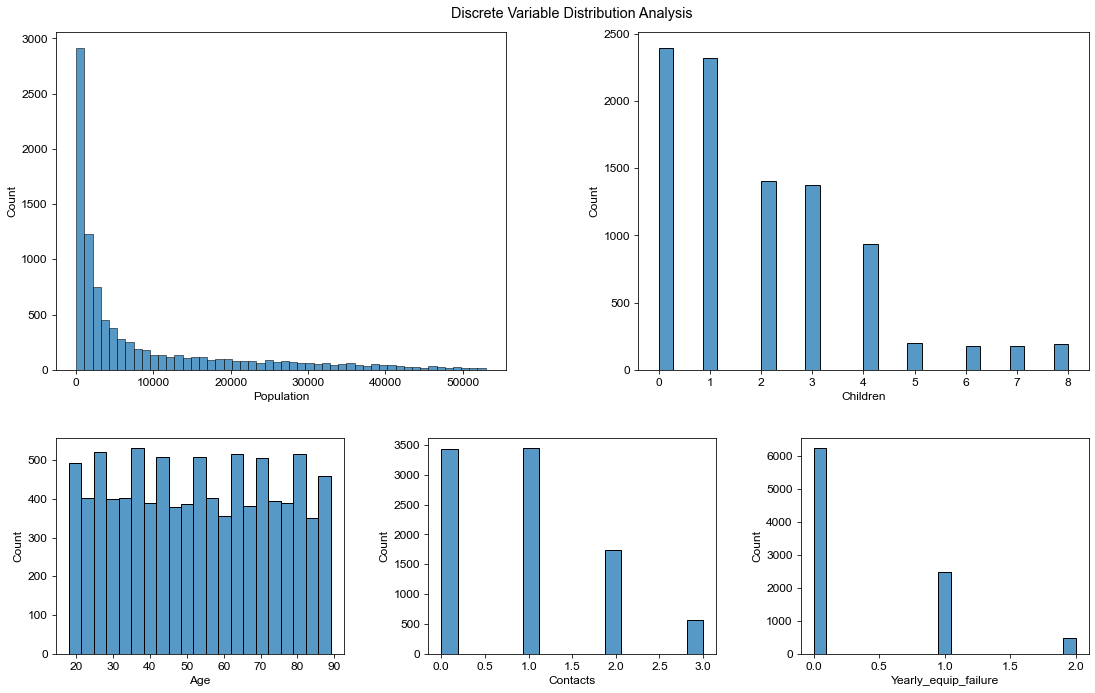

In [28]:
ax0 = pw.Brick(figsize=(4,3))
sns.histplot(df1.Population, ax=ax0)
ax1 = pw.Brick(figsize=(4,3))
sns.histplot(df1.Children, ax=ax1)
ax2 = pw.Brick(figsize=(4,3))
sns.histplot(df1.Age, ax=ax2)
ax3 = pw.Brick(figsize=(4,3))
sns.histplot(df1.Contacts, ax=ax3)
ax4 = pw.Brick(figsize=(4,3))
sns.histplot(df1.Yearly_equip_failure, ax=ax4)
stacks = (ax0|ax1)/(ax2|ax3|ax4)
stacks.set_suptitle('Discrete Variable Distribution Analysis')
stacks.savefig()

### Nominal Variables

In [29]:
## Identify variables with Yes or No values
nominal = ['Techie', 'Port_modem', 'Tablet', 'Phone', 'StreamingTV', 'StreamingMovies']

In [30]:
## Store value distribution in data frame
nominal_df = pd.DataFrame([df[var].value_counts() for var in nominal])

In [31]:
nominal_df

,No,Yes
Techie,7644,1543
Port_modem,4741,4446
Tablet,6448,2739
Phone,864,8323
StreamingTV,4661,4526
StreamingMovies,4685,4502


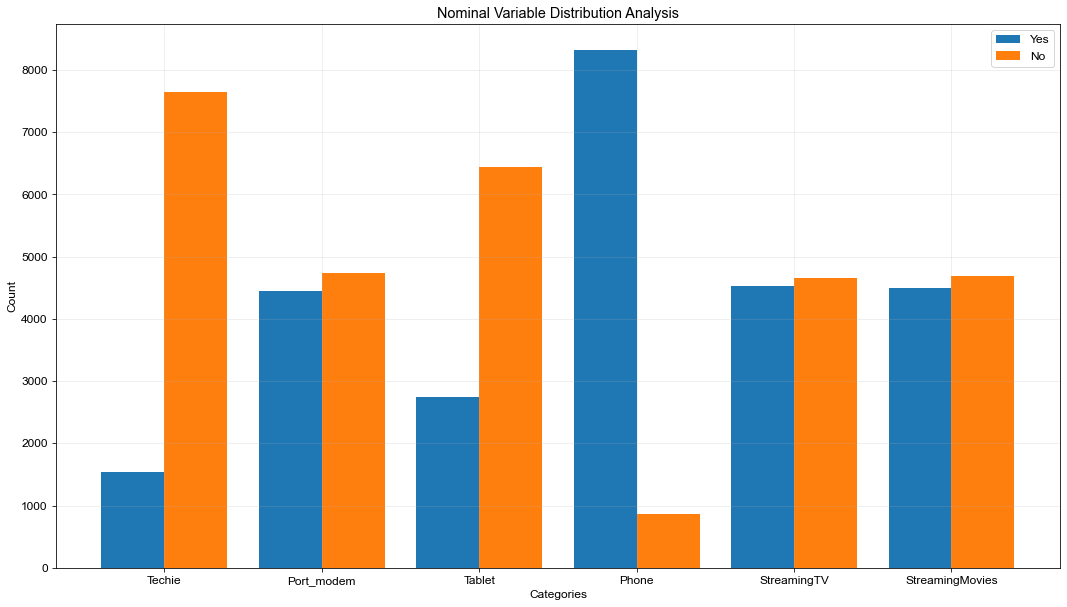

In [32]:
x_axis = np.arange(len(nominal_df.index))
plt.bar(x_axis - 0.2, nominal_df.Yes, 0.4, label='Yes')
plt.bar(x_axis + 0.2, nominal_df.No, 0.4, label='No')
plt.xticks(x_axis, nominal_df.index)
plt.title('Nominal Variable Distribution Analysis')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.grid(alpha=0.25)
plt.legend()
plt.show()

In [33]:
## Get contract and internet service distributions
contract = pd.DataFrame(df.Contract.value_counts())
internet_service = pd.DataFrame(df.InternetService.value_counts())

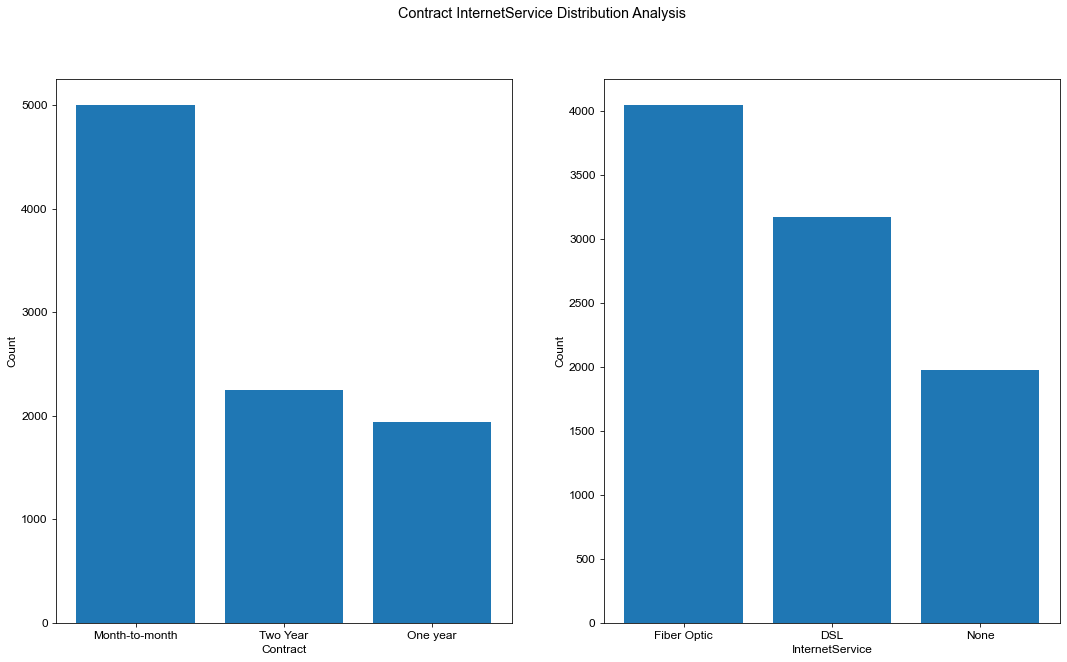

In [34]:
## Create x-axis labels
x_contract = np.arange(len(contract.index))
x_internet_service = np.arange(len(internet_service.index))

## Plot contract and internet service distributions
fig, ax = plt.subplots(1,2)
plt.suptitle('Contract InternetService Distribution Analysis')
ax[0].bar(x_contract, contract.Contract)
ax[0].set_xticks(x_contract, contract.index)
ax[0].set_xlabel('Contract')
ax[0].set_ylabel('Count')
ax[1].bar(x_internet_service, internet_service.InternetService)
ax[1].set_xticks(x_internet_service, internet_service.index)
ax[1].set_xlabel('InternetService')
ax[1].set_ylabel('Count')
plt.show()

## Bivariate Distributions

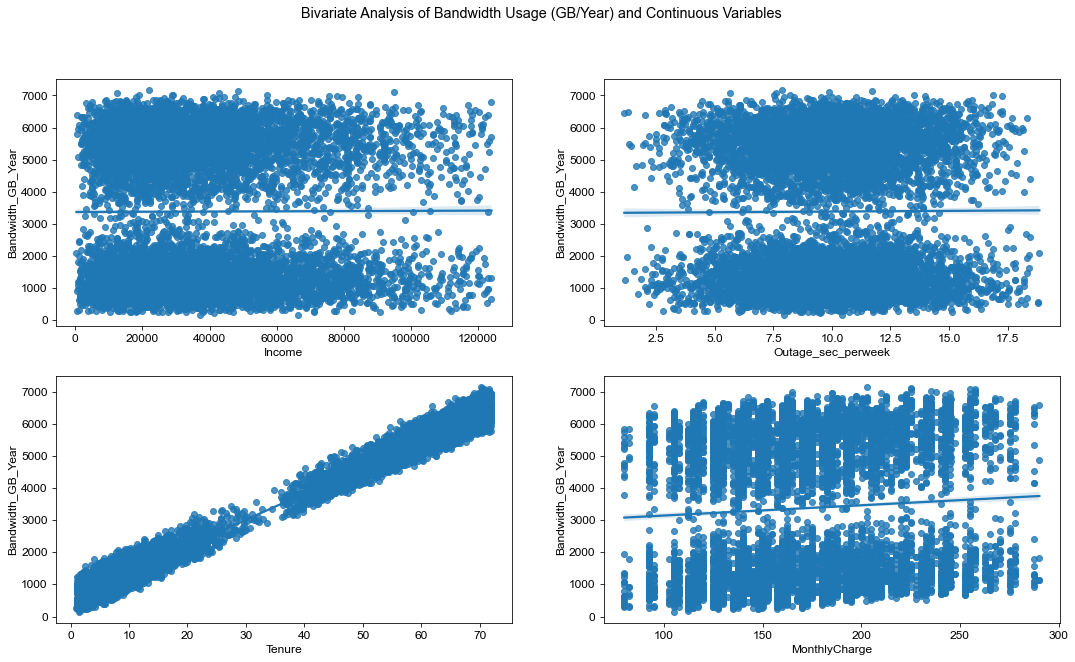

In [35]:
fig, ax = plt.subplots(2,2)
plt.suptitle('Bivariate Analysis of Bandwidth Usage (GB/Year) and Continuous Variables')
sns.regplot(x='Income', y='Bandwidth_GB_Year', data=df1, ax=ax[0,0])
sns.regplot(x='Outage_sec_perweek', y='Bandwidth_GB_Year', data=df1, ax=ax[0,1])
sns.regplot(x='Tenure', y='Bandwidth_GB_Year', data=df1, ax=ax[1,0])
sns.regplot(x='MonthlyCharge', y='Bandwidth_GB_Year', data=df1, ax=ax[1,1])
plt.show()

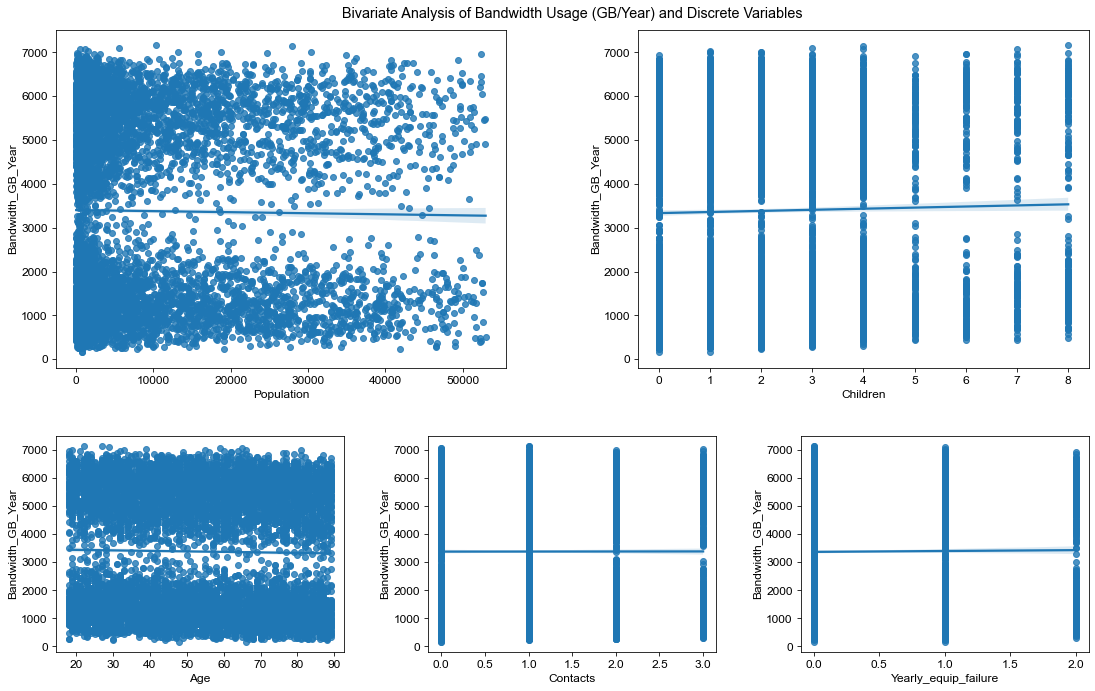

In [36]:
ax0 = pw.Brick(figsize=(4,3))
sns.regplot(x='Population', y='Bandwidth_GB_Year', data=df1, ax=ax0)
ax1 = pw.Brick(figsize=(4,3))
sns.regplot(x='Children', y='Bandwidth_GB_Year', data=df1, ax=ax1)
ax2 = pw.Brick(figsize=(4,3))
sns.regplot(x='Age',  y='Bandwidth_GB_Year', data=df1, ax=ax2)
ax3 = pw.Brick(figsize=(4,3))
sns.regplot(x='Contacts', y='Bandwidth_GB_Year', data=df1, ax=ax3)
ax4 = pw.Brick(figsize=(4,3))
sns.regplot(x='Yearly_equip_failure', y='Bandwidth_GB_Year', data=df1, ax=ax4)
stacks = ((ax0|ax1)/(ax2|ax3|ax4))
stacks.set_suptitle('Bivariate Analysis of Bandwidth Usage (GB/Year) and Discrete Variables')
stacks.savefig()

In [37]:
## Calculate correlation coefficients
cont_disc = ['Income', 'Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Population', 'Children', 'Age', 'Contacts', 
             'Yearly_equip_failure']
corr = pd.DataFrame(index=cont_disc, columns=['correlation'])
corr['correlation'] = [df1[n].corr(df1['Bandwidth_GB_Year']) for n in cont_disc]

In [38]:
corr

,correlation
Income,0.004005
Outage_sec_perweek,0.005777
Tenure,0.991519
MonthlyCharge,0.062949
Population,-0.013104
Children,0.021728
Age,-0.017134
Contacts,0.000946
Yearly_equip_failure,0.008306


# Data Wrangling
---

In [39]:
## Create InternetDSL and InternetFiberOptic columns
dsl = []
fiber = []
for i in df1.InternetService:
    if i == 'DSL':
        dsl.append(1)
        fiber.append(0)
    elif i == 'Fiber Optic':
        dsl.append(0)
        fiber.append(1)
    else:
        dsl.append(0)
        fiber.append(0)

In [40]:
df1['InternetDSL'] = dsl
df1['InternetFiberOptic'] = fiber

In [41]:
df1.head()

,Population,Children,Age,Income,Outage_sec_perweek,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,StreamingTV,StreamingMovies,Tenure,MonthlyCharge,Bandwidth_GB_Year,InternetDSL,InternetFiberOptic
0,38,0,68,28561.99,7.978323,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,6.795513,172.455519,904.536110,0,1
1,10446,1,27,21704.77,11.699080,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,1.156681,242.632554,800.982766,0,1
2,3735,4,50,9609.57,10.752800,0,1,Yes,Two Year,Yes,No,DSL,Yes,No,Yes,15.754144,159.947583,2054.706961,1,0
3,13863,1,48,18925.23,14.913540,2,0,Yes,Two Year,No,No,DSL,Yes,Yes,No,17.087227,119.956840,2164.579412,1,0
4,11352,0,83,40074.19,8.147417,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,Yes,No,1.670972,149.948316,271.493436,0,1


In [42]:
## Encode InternetService column
internet_service = {'DSL':'Yes', 'Fiber Optic':'Yes', 'None':'No'}
df1.InternetService.replace(internet_service, inplace=True)

In [43]:
df1.InternetService

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
9182    Yes
9183    Yes
9184    Yes
9185    Yes
9186    Yes
Name: InternetService, Length: 9187, dtype: object

In [44]:
## Initiate label encoder
le = LabelEncoder()

In [45]:
## Encode variables
for col in df1.columns:
    if 'Yes' in df1[col].values:
        df1[col] = le.fit_transform(df1[col])

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9187 entries, 0 to 9186
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            9187 non-null   int64  
 1   Children              9187 non-null   int64  
 2   Age                   9187 non-null   int64  
 3   Income                9187 non-null   float64
 4   Outage_sec_perweek    9187 non-null   float64
 5   Contacts              9187 non-null   int64  
 6   Yearly_equip_failure  9187 non-null   int64  
 7   Techie                9187 non-null   int64  
 8   Contract              9187 non-null   object 
 9   Port_modem            9187 non-null   int64  
 10  Tablet                9187 non-null   int64  
 11  InternetService       9187 non-null   int64  
 12  Phone                 9187 non-null   int64  
 13  StreamingTV           9187 non-null   int64  
 14  StreamingMovies       9187 non-null   int64  
 15  Tenure               

In [47]:
contract = {'Month-to-month':0, 'One year':1, 'Two Year':2}
df1.Contract.replace(contract, inplace=True)

In [48]:
df1.Contract

0       1
1       0
2       2
3       2
4       0
       ..
9182    0
9183    0
9184    0
9185    2
9186    0
Name: Contract, Length: 9187, dtype: int64

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9187 entries, 0 to 9186
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            9187 non-null   int64  
 1   Children              9187 non-null   int64  
 2   Age                   9187 non-null   int64  
 3   Income                9187 non-null   float64
 4   Outage_sec_perweek    9187 non-null   float64
 5   Contacts              9187 non-null   int64  
 6   Yearly_equip_failure  9187 non-null   int64  
 7   Techie                9187 non-null   int64  
 8   Contract              9187 non-null   int64  
 9   Port_modem            9187 non-null   int64  
 10  Tablet                9187 non-null   int64  
 11  InternetService       9187 non-null   int64  
 12  Phone                 9187 non-null   int64  
 13  StreamingTV           9187 non-null   int64  
 14  StreamingMovies       9187 non-null   int64  
 15  Tenure               

In [50]:
## Store clean data as CSV
df1.to_csv('churn_linear_regression.csv')

# Model Comparison and Analysis
---

## Initial Model

In [51]:
## Split target variable from explanatory variables
X, y = df1.drop('Bandwidth_GB_Year', axis=1), df1['Bandwidth_GB_Year']

In [52]:
## Add intercept
X = sm.add_constant(X)

In [53]:
## Split training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [54]:
## Create and fit model
mod = sm.OLS(y_train, X_train).fit()

In [55]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.295e+05
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:38:31   Log-Likelihood:                -37833.
No. Observations:                6890   AIC:                         7.570e+04
Df Residuals:                    6871   BIC:                         7.583e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -19.3819      5.701     -3.400      0.001     -30.558      -8.206
Population            3.953e-05   5.99e-05      0.660      0.510    -7.8e-05       0.000
Children                31.2508      0.373     83.779      0.000      30.520      31.982
Age                     -3.2700      0.034    -95.275      0.000      -3.337      -3.203
Income               -5.045e-05   2.83e-05     -1.781      0.075      -0.000    5.07e-06
Outage_sec_perweek       0.2803      0.243      1.155      0.248      -0.195       0.756
Contacts                 1.1097      0.790      1.404      0.160      -0.439       2.659
Yearly_equip_failure    -1.2651      1.208     -1.047      0.295      -3.633       1.103
Techie                   0.1437      1.903      0.075      0.940      -3.587       3.874
Contract                -0.2303      0.845     -0.272      0.785      -1.888       1.427
Port_modem               2.3049      1.418      1.626      0.104      -0.474       5.084
Tablet                  -0.0973      1.547     -0.063      0.950      -3.130       2.935
InternetService         92.5006      1.249     74.042      0.000      90.052      94.950
Phone                   -1.2713      2.410     -0.527      0.598      -5.996       3.454
StreamingTV            101.4880      1.924     52.759      0.000      97.717     105.259
StreamingMovies         52.4394      2.146     24.435      0.000      48.232      56.646
Tenure                  81.8905      0.027   3055.606      0.000      81.838      81.943
MonthlyCharge            3.0589      0.030    100.339      0.000       2.999       3.119
InternetDSL            283.4429      1.018    278.352      0.000     281.447     285.439
InternetFiberOptic    -190.9422      1.103   -173.099      0.000    -193.105    -188.780
==============================================================================
Omnibus:                      136.734   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.304
Skew:                           0.149   Prob(JB):                     4.05e-20
Kurtosis:                       2.529   Cond. No.                     1.09e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.25e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

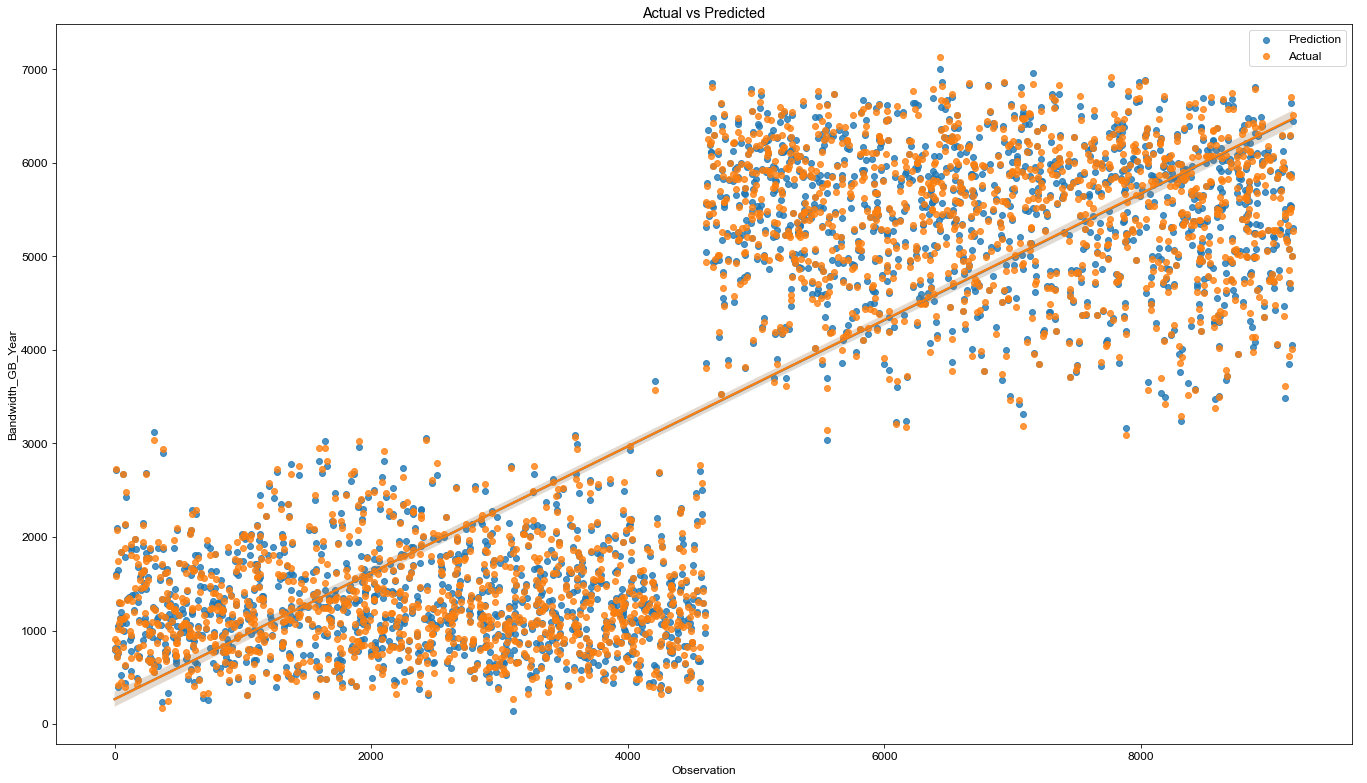

In [56]:
## Plot actual and predictions
pred = mod.predict(X_test)
ax0 = pw.Brick(figsize=(18,10))
sns.regplot(pred.index, pred, label='Prediction', ax=ax0)
sns.regplot(y_test.index, y_test, label='Actual', ax=ax0)
ax0.set_title('Actual vs Predicted')
ax0.set_xlabel('Observation')
ax0.legend()
ax0.savefig()

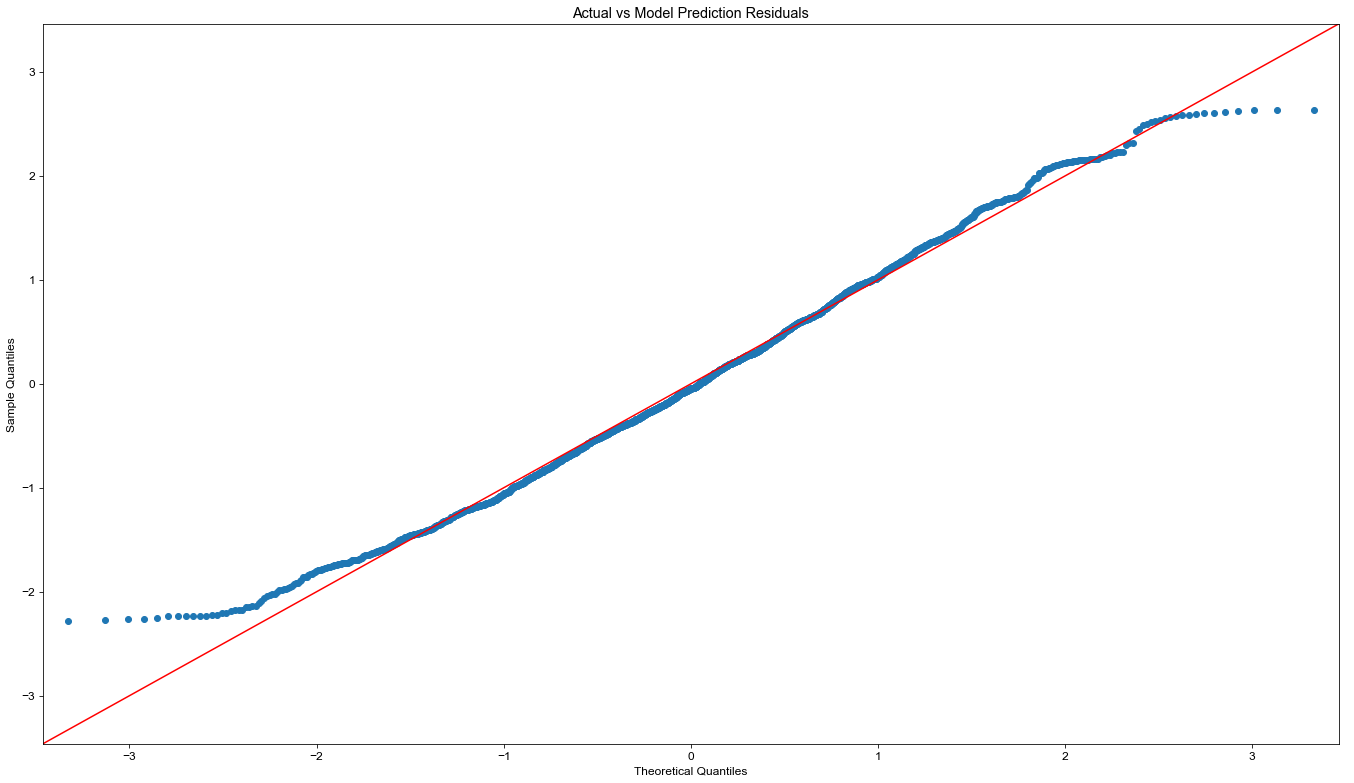

In [57]:
## Plot residuals
ax0 = pw.Brick(figsize=(18,10))
sm.qqplot(y_test - pred, fit=True, line='45', ax=ax0)
ax0.set_title('Actual vs Model Prediction Residuals')
ax0.savefig()

In [58]:
initial_features = X.columns

In [59]:
initial_rmse = rmse(y_test, pred)

In [60]:
initial_rmse

59.73149869678823

## Feature Selection

### Iterate Through Features

In [61]:
## Select feature with highest correlation to target variable
feature_1 = corr.iloc[np.where(corr == corr.max())[0]].index[0]

In [62]:
## Create list of features already included
selected_features = [feature_1]

In [63]:
## Create dictionary to store rmse and features
rmse_vals = {}

In [64]:
## Create dataframe to store r2 values
results = pd.DataFrame(index=X.columns, columns=['R_Squared', 'RMSE'])

In [65]:
## Define evaluator function to score models
def evaluator(X, y, selected_features):
    ## Create results dataframe
    results = pd.DataFrame(index=X.drop(selected_features, axis=1).columns, columns=['R_Squared', 'RMSE'])
    ## Create feature dataframe
    X_feature = X[selected_features]
    ## Add constant
    X_feature = sm.add_constant(X_feature)
    ## Split train test
    X_train, X_test, y_train, y_test = train_test_split(X_feature, y)
    for col in X.drop(selected_features, axis=1).columns:
        ## Add feature to dataframe
        X_train[col] = X.loc[X_train.index][col]
        X_test[col] = X.loc[X_test.index][col]
        ## Create and fit model
        mod = sm.OLS(y_train, X_train).fit()
        ## Predict target
        pred = mod.predict(X_test)
        ## Calculate and store r2 value and rmse
        results['R_Squared'].loc[col] = np.corrcoef(y_test, pred)[0, 1]**2
        results['RMSE'].loc[col] = rmse(y_test, pred)
        ## Revert X_train, X_test
        X_train = X_train[selected_features]
        X_test = X_test[selected_features]
    ## Sort results by r-squared values
    results.sort_values('R_Squared', ascending=False, inplace=True)
    ## Add highest r-squared value to selected features
    selected_features.append(results.index[0])
    ## Display results
    display(results.head(3))
    ## Test new model
    mod = sm.OLS(y_train, X_train).fit()
    pred = mod.predict(X_test)
    return rmse(y_test, pred), X_test.columns.values

In [66]:
for i in range(len(X.columns)-2):
    print(i+2, 'Features:', selected_features)
    rmse_vals[i] = evaluator(X.drop('const', axis=1), y, selected_features)

2 Features: ['Tenure']


,R_Squared,RMSE
InternetDSL,0.99052,309.13525
MonthlyCharge,0.987277,247.701353
StreamingMovies,0.983562,355.489762


3 Features: ['Tenure', 'InternetDSL']


,R_Squared,RMSE
MonthlyCharge,0.99636,134.937123
StreamingTV,0.992831,224.162623
StreamingMovies,0.992608,226.563135


4 Features: ['Tenure', 'InternetDSL', 'MonthlyCharge']


,R_Squared,RMSE
Age,0.997744,104.679983
InternetService,0.996808,126.039422
InternetFiberOptic,0.996808,126.039422


5 Features: ['Tenure', 'InternetDSL', 'MonthlyCharge', 'Age']


,R_Squared,RMSE
Children,0.998429,87.532824
InternetService,0.998279,91.365255
InternetFiberOptic,0.998279,91.365255


6 Features: ['Tenure', 'InternetDSL', 'MonthlyCharge', 'Age', 'Children']


,R_Squared,RMSE
InternetFiberOptic,0.998922,71.679371
InternetService,0.998922,71.679371
StreamingTV,0.998782,76.145207


7 Features: ['Tenure', 'InternetDSL', 'MonthlyCharge', 'Age', 'Children', 'InternetFiberOptic']


,R_Squared,RMSE
StreamingTV,0.999169,63.978035
Population,0.998965,71.107843
Phone,0.998936,72.430442


8 Features: ['Tenure', 'InternetDSL', 'MonthlyCharge', 'Age', 'Children', 'InternetFiberOptic', 'StreamingTV']


,R_Squared,RMSE
StreamingMovies,0.999277,58.901004
Population,0.99921,61.529482
Phone,0.999184,62.589656


9 Features: ['Tenure', 'InternetDSL', 'MonthlyCharge', 'Age', 'Children', 'InternetFiberOptic', 'StreamingTV', 'StreamingMovies']


,R_Squared,RMSE
Phone,0.999277,58.827015
Population,0.999276,58.829951
Income,0.999276,58.865322


10 Features: ['Tenure', 'InternetDSL', 'MonthlyCharge', 'Age', 'Children', 'InternetFiberOptic', 'StreamingTV', 'StreamingMovies', 'Phone']


,R_Squared,RMSE
Contacts,0.999263,59.392297
Techie,0.999263,59.394
InternetService,0.999263,59.39429


11 Features: ['Tenure', 'InternetDSL', 'MonthlyCharge', 'Age', 'Children', 'InternetFiberOptic', 'StreamingTV', 'StreamingMovies', 'Phone', 'Contacts']


,R_Squared,RMSE
Tablet,0.999285,58.825985
InternetService,0.999285,58.827057
Contract,0.999285,58.8274


12 Features: ['Tenure', 'InternetDSL', 'MonthlyCharge', 'Age', 'Children', 'InternetFiberOptic', 'StreamingTV', 'StreamingMovies', 'Phone', 'Contacts', 'Tablet']


,R_Squared,RMSE
Yearly_equip_failure,0.999259,59.719562
Population,0.999259,59.746438
Income,0.999259,59.747505


13 Features: ['Tenure', 'InternetDSL', 'MonthlyCharge', 'Age', 'Children', 'InternetFiberOptic', 'StreamingTV', 'StreamingMovies', 'Phone', 'Contacts', 'Tablet', 'Yearly_equip_failure']


,R_Squared,RMSE
Income,0.999257,59.760352
InternetService,0.999257,59.787192
Techie,0.999257,59.789266


14 Features: ['Tenure', 'InternetDSL', 'MonthlyCharge', 'Age', 'Children', 'InternetFiberOptic', 'StreamingTV', 'StreamingMovies', 'Phone', 'Contacts', 'Tablet', 'Yearly_equip_failure', 'Income']


,R_Squared,RMSE
Population,0.999278,58.699745
Outage_sec_perweek,0.999276,58.748611
Techie,0.999276,58.748989


15 Features: ['Tenure', 'InternetDSL', 'MonthlyCharge', 'Age', 'Children', 'InternetFiberOptic', 'StreamingTV', 'StreamingMovies', 'Phone', 'Contacts', 'Tablet', 'Yearly_equip_failure', 'Income', 'Population']


,R_Squared,RMSE
Outage_sec_perweek,0.999273,58.962119
InternetService,0.999273,58.983378
Contract,0.999273,58.983833


16 Features: ['Tenure', 'InternetDSL', 'MonthlyCharge', 'Age', 'Children', 'InternetFiberOptic', 'StreamingTV', 'StreamingMovies', 'Phone', 'Contacts', 'Tablet', 'Yearly_equip_failure', 'Income', 'Population', 'Outage_sec_perweek']


,R_Squared,RMSE
Techie,0.999291,58.541748
InternetService,0.999289,58.634576
Port_modem,0.999289,58.640352


17 Features: ['Tenure', 'InternetDSL', 'MonthlyCharge', 'Age', 'Children', 'InternetFiberOptic', 'StreamingTV', 'StreamingMovies', 'Phone', 'Contacts', 'Tablet', 'Yearly_equip_failure', 'Income', 'Population', 'Outage_sec_perweek', 'Techie']


,R_Squared,RMSE
Contract,0.999255,59.137429
Port_modem,0.999254,59.171793
InternetService,0.999254,59.17246


18 Features: ['Tenure', 'InternetDSL', 'MonthlyCharge', 'Age', 'Children', 'InternetFiberOptic', 'StreamingTV', 'StreamingMovies', 'Phone', 'Contacts', 'Tablet', 'Yearly_equip_failure', 'Income', 'Population', 'Outage_sec_perweek', 'Techie', 'Contract']


,R_Squared,RMSE
InternetService,0.999277,58.631658
Port_modem,0.999276,58.641347


19 Features: ['Tenure', 'InternetDSL', 'MonthlyCharge', 'Age', 'Children', 'InternetFiberOptic', 'StreamingTV', 'StreamingMovies', 'Phone', 'Contacts', 'Tablet', 'Yearly_equip_failure', 'Income', 'Population', 'Outage_sec_perweek', 'Techie', 'Contract', 'InternetService']


,R_Squared,RMSE
Port_modem,0.999275,58.908477


In [67]:
## Review model performance
rmse_df = pd.DataFrame(rmse_vals, index=['RMSE', 'Features']).transpose().sort_values('RMSE')
rmse_df

,RMSE,Features
16,58.631658,"[Tenure, InternetDSL, MonthlyCharge, Age, Chil..."
14,58.634576,"[Tenure, InternetDSL, MonthlyCharge, Age, Chil..."
12,58.74935,"[Tenure, InternetDSL, MonthlyCharge, Age, Chil..."
9,58.827057,"[Tenure, InternetDSL, MonthlyCharge, Age, Chil..."
7,58.898088,"[Tenure, InternetDSL, MonthlyCharge, Age, Chil..."
17,58.920583,"[Tenure, InternetDSL, MonthlyCharge, Age, Chil..."
13,58.983378,"[Tenure, InternetDSL, MonthlyCharge, Age, Chil..."
15,59.17246,"[Tenure, InternetDSL, MonthlyCharge, Age, Chil..."
8,59.39429,"[Tenure, InternetDSL, MonthlyCharge, Age, Chil..."
10,59.749769,"[Tenure, InternetDSL, MonthlyCharge, Age, Chil..."


In [68]:
## Select features from best-performing model
features = rmse_df['Features'].values[0]

In [69]:
X_new = X[features]

In [70]:
def get_vif(X):
    ## Add constant
    X['const'] = 1.0
    ## Create dataframe to store vif values
    vif = pd.DataFrame()
    vif['Variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='const']
    return vif

In [71]:
## Calculate vif to check for multicollinearity
vif = get_vif(X_new)

In [72]:
vif

,Variable,VIF
0,Tenure,1.001297
1,InternetDSL,1.793196
2,MonthlyCharge,3.401374
3,Age,1.001648
4,Children,1.002664
5,InternetFiberOptic,2.225231
6,StreamingTV,1.820656
7,StreamingMovies,2.283659
8,Phone,1.001750
9,Contacts,1.001891


In [73]:
## Remove variables with VIF over 5
X_new = X_new[vif['Variable'][vif['VIF'] < 5]]

In [74]:
## Repeat multicollinearity calculation
vif = get_vif(X_new)

In [75]:
vif

,Variable,VIF
0,Tenure,1.001297
1,InternetDSL,1.793196
2,MonthlyCharge,3.401374
3,Age,1.001648
4,Children,1.002664
5,InternetFiberOptic,2.225231
6,StreamingTV,1.820656
7,StreamingMovies,2.283659
8,Phone,1.001750
9,Contacts,1.001891


In [76]:
features = vif.Variable

In [77]:
## View selected features
X_train[features].head()

,Tenure,InternetDSL,MonthlyCharge,Age,Children,InternetFiberOptic,StreamingTV,StreamingMovies,Phone,Contacts,Tablet,Yearly_equip_failure,Income,Population,Outage_sec_perweek,Techie,Contract
7264,62.555410,1,147.456400,41,0,0,0,0,1,1,0,1,28238.85,3764,6.940518,0,0
4741,66.455250,1,174.958100,32,0,0,1,0,1,1,0,0,42060.33,739,10.215130,0,2
1750,9.727742,1,200.132293,49,0,0,1,1,1,2,0,0,72997.73,658,13.332718,0,0
1066,10.223708,0,207.497370,41,1,1,0,1,1,2,0,0,55264.57,38753,12.845989,1,1
6704,57.104790,1,232.624000,53,0,0,1,1,1,2,0,0,13227.96,14630,8.485172,0,0


In [78]:
## Create the final model
final_mod = sm.OLS(y_train, sm.add_constant(X_train[features])).fit()

In [79]:
## View final model score
final_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.605e+05
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:46:02   Log-Likelihood:                -37834.
No. Observations:                6890   AIC:                         7.570e+04
Df Residuals:                    6872   BIC:                         7.583e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -18.4514      5.673     -3.252      0.001     -29.572      -7.330
Tenure                  81.8912      0.027   3055.684      0.000      81.839      81.944
InternetDSL            375.9386      1.995    188.454      0.000     372.028     379.849
MonthlyCharge            3.0591      0.030    100.333      0.000       2.999       3.119
Age                     -3.2694      0.034    -95.252      0.000      -3.337      -3.202
Children                31.2675      0.373     83.845      0.000      30.537      31.999
InternetFiberOptic     -98.4228      2.126    -46.299      0.000    -102.590     -94.256
StreamingTV            101.4856      1.924     52.752      0.000      97.714     105.257
StreamingMovies         52.4421      2.146     24.433      0.000      48.235      56.650
Phone                   -1.2266      2.410     -0.509      0.611      -5.952       3.499
Contacts                 1.1032      0.790      1.396      0.163      -0.446       2.652
Tablet                  -0.0880      1.547     -0.057      0.955      -3.121       2.945
Yearly_equip_failure    -1.2349      1.208     -1.022      0.307      -3.603       1.133
Income                -5.05e-05   2.83e-05     -1.783      0.075      -0.000    5.02e-06
Population            4.088e-05   5.99e-05      0.682      0.495   -7.66e-05       0.000
Outage_sec_perweek       0.2814      0.243      1.160      0.246      -0.194       0.757
Techie                   0.1110      1.903      0.058      0.953      -3.620       3.842
Contract                -0.2253      0.846     -0.266      0.790      -1.883       1.432
==============================================================================
Omnibus:                      137.448   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.804
Skew:                           0.150   Prob(JB):                     3.16e-20
Kurtosis:                       2.529   Cond. No.                     3.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
## Remove insignificant variable and fit reduced model
reduced_features = final_mod.pvalues[(final_mod.pvalues.values < 0.05)].drop('const').index
reduced_mod = sm.OLS(y_train, sm.add_constant(X_train[reduced_features])).fit()

In [81]:
reduced_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.191e+06
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:46:44   Log-Likelihood:                -37839.
No. Observations:                6890   AIC:                         7.570e+04
Df Residuals:                    6881   BIC:                         7.576e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -17.9262      4.315     -4.155      0.000     -26.384      -9.468
Tenure                81.8910      0.027   3057.593      0.000      81.838      81.943
InternetDSL          375.9218      1.994    188.486      0.000     372.012     379.832
MonthlyCharge          3.0585      0.030    100.388      0.000       2.999       3.118
Age                   -3.2688      0.034    -95.293      0.000      -3.336      -3.202
Children              31.2557      0.373     83.894      0.000      30.525      31.986
InternetFiberOptic   -98.3401      2.125    -46.287      0.000    -102.505     -94.175
StreamingTV          101.5106      1.923     52.790      0.000      97.741     105.280
StreamingMovies       52.5678      2.144     24.520      0.000      48.365      56.770
==============================================================================
Omnibus:                      137.155   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.270
Skew:                           0.148   Prob(JB):                     4.12e-20
Kurtosis:                       2.528   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
pred = reduced_mod.predict(sm.add_constant(X_test[reduced_features]))

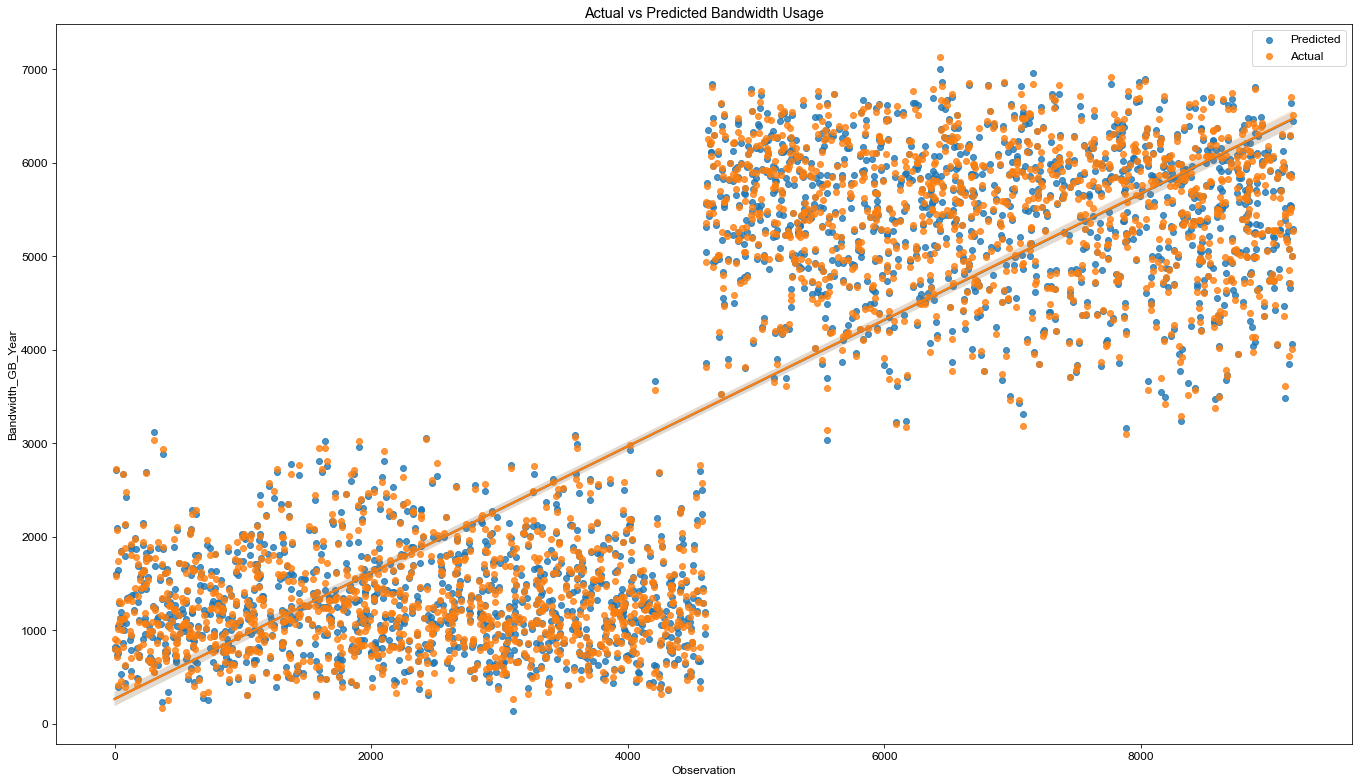

In [83]:
ax0 = pw.Brick(figsize=(18,10))
sns.regplot(pred.index, pred, label='Predicted', ax=ax0)
sns.regplot(y_test.index, y_test, label='Actual', ax=ax0)
ax0.set_title('Actual vs Predicted Bandwidth Usage')
ax0.set_xlabel('Observation')
ax0.legend()
ax0.savefig()

In [84]:
residuals = reduced_mod.resid

In [85]:
resid = y_test - pred.values

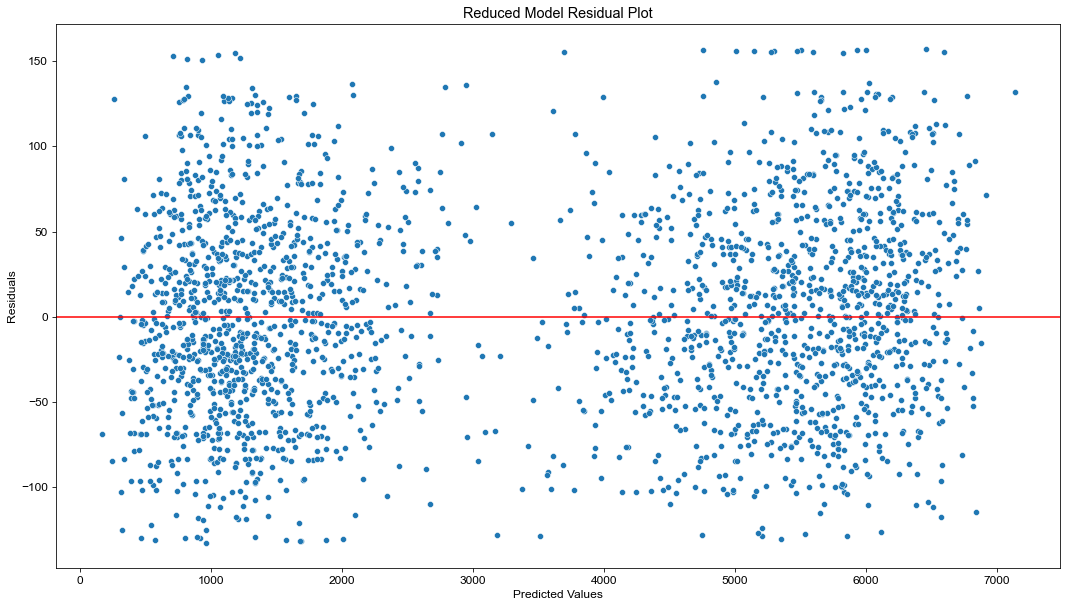

In [86]:
sns.scatterplot(x=y_test, y=resid)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Reduced Model Residual Plot')
plt.show()

In [87]:
## Calculate residual standard error
rse = np.sqrt(sum(resid**2)/(len(y) - len(reduced_features)))

In [88]:
rse

29.863278851825452

In [89]:
final_rmse = rmse(y_test, pred)

In [90]:
print('Initial RMSE:', initial_rmse, '\nInitial Features:', len(initial_features))
print('Final RMSE:', final_rmse, '\nFinal Features:', len(reduced_features), end='\n\n')
print('Final features used:')
for n in reduced_features:
    print(n)

Initial RMSE: 59.73149869678823 
Initial Features: 20
Final RMSE: 59.69729830449507 
Final Features: 8

Final features used:
Tenure
InternetDSL
MonthlyCharge
Age
Children
InternetFiberOptic
StreamingTV
StreamingMovies


In [91]:
final_df = X[reduced_features]
final_df['Bandwidth_GB_Year'] = y

In [92]:
final_df

,Tenure,InternetDSL,MonthlyCharge,Age,Children,InternetFiberOptic,StreamingTV,StreamingMovies,Bandwidth_GB_Year
0,6.795513,0,172.455519,68,0,1,0,1,904.536110
1,1.156681,0,242.632554,27,1,1,1,1,800.982766
2,15.754144,1,159.947583,50,4,0,0,1,2054.706961
3,17.087227,1,119.956840,48,1,0,1,0,2164.579412
4,1.670972,0,149.948316,83,0,1,1,0,271.493436
...,...,...,...,...,...,...,...,...,...
9182,49.921560,1,142.482700,46,1,0,0,1,4945.756430
9183,68.197130,1,159.979400,23,3,0,0,0,6511.252601
9184,47.416890,0,169.974100,48,1,1,0,0,4159.305799
9185,71.095600,0,252.624000,39,1,1,1,1,6468.456752


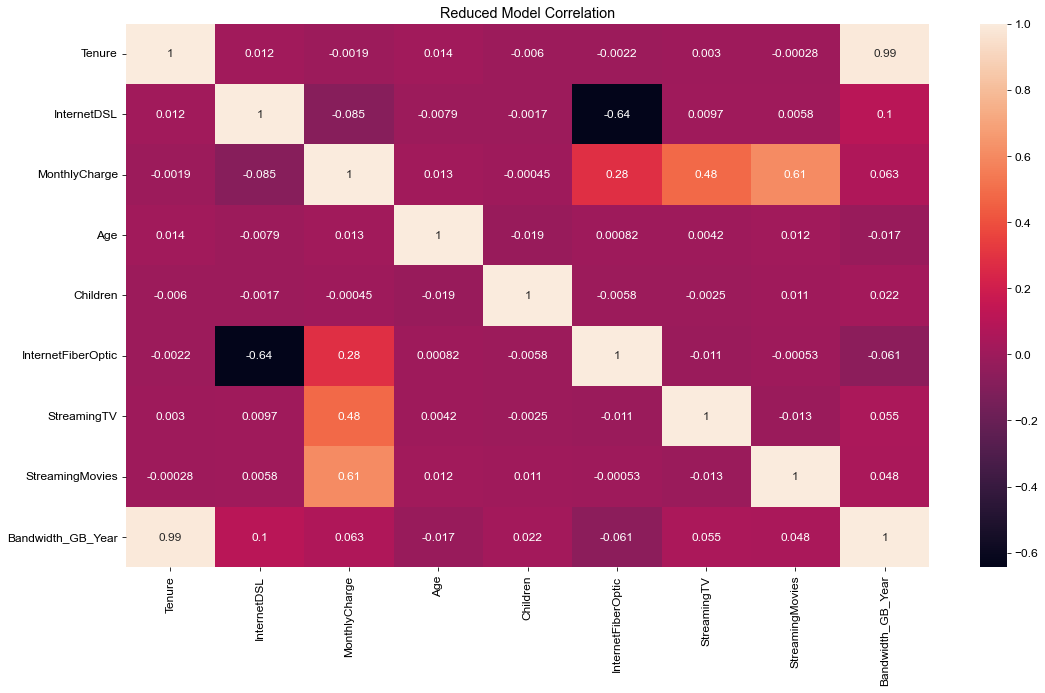

In [93]:
plt.subplot()
sns.heatmap(final_df.corr(), annot=True)
plt.title('Reduced Model Correlation')
plt.show()